<a href="https://colab.research.google.com/github/ErykCud/MLinFin2024/blob/main/Case2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv')
movies = pd.read_csv('https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv')
movies_filtered_sci_fi = movies[movies['genres'].str.contains("Sci-Fi")]
movies_comedy = movies[movies['genres'].str.contains("Comedy")]
movies_action = movies[movies['genres'].str.contains("Action")]
# Filtruje tylko filmy sci_fi, jest ich 980
movies_filtered_sci_fi.nunique()
ratings




,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


<ipython-input-4-998ea4b025ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings_comedy, palette="viridis")


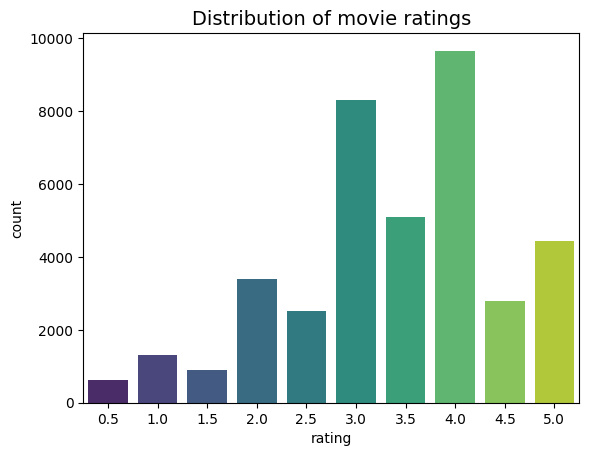

In [4]:
#filtruje ratingi filmów komediowych
ratings_comedy = ratings[ratings['movieId'].isin(movies_comedy['movieId'])]
#tworze wykres
sns.countplot(x="rating", data=ratings_comedy, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [5]:
#filtruje oceny filmów akcji
ratings_action = ratings[ratings['movieId'].isin(movies_action['movieId'])]
#sprawdzam średnią dla filmów akcji, wychodzi ok 3,45
ratings_action['rating'].mean()

3.447984331646809

In [6]:
action__movie_ratings = ratings_action.merge(movies_action, on='movieId')
action__movie_ratings

,userId,movieId,rating,timestamp,title,genres
0,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
1,6,6,4.0,845553757,Heat (1995),Action|Crime|Thriller
2,11,6,5.0,902154266,Heat (1995),Action|Crime|Thriller
3,18,6,4.0,1460138360,Heat (1995),Action|Crime|Thriller
4,23,6,4.0,1107342267,Heat (1995),Action|Crime|Thriller
...,...,...,...,...,...,...
30630,610,147662,3.0,1479544214,Return of the One-Armed Swordsman (1969),Action|Adventure
30631,610,158721,3.5,1479542491,Gen-X Cops (1999),Action|Comedy|Thriller
30632,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
30633,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama


In [7]:
#filtruje top 3 filmów akcji
mean_ratings = action__movie_ratings.groupby('movieId')[['rating']].mean()

highest_rated = mean_ratings['rating'].idxmax()

top_3_indices = []
for _ in range(3):
    current_max_idx = mean_ratings['rating'].idxmax()
    top_3_indices.append(current_max_idx)
    mean_ratings['rating'].loc[current_max_idx] = -float('inf')
#trzy filmy akcji z najwyższą średnią ocen
print(movies_action[movies_action['movieId'].isin(top_3_indices)])
#średnia ocen wszystkich filmów akcji
mean_ratings.merge(movies_action, on='movieId')


      movieId                                           title  \
666       876  Supercop 2 (Project S) (Chao ji ji hua) (1993)   
1228     1631                          Assignment, The (1997)   
1647     2196                                Knock Off (1998)   

                            genres  
666   Action|Comedy|Crime|Thriller  
1228               Action|Thriller  
1647                        Action  


,movieId,rating,title,genres
0,6,3.946078,Heat (1995),Action|Crime|Thriller
1,9,3.125000,Sudden Death (1995),Action
2,10,3.496212,GoldenEye (1995),Action|Adventure|Thriller
3,15,3.000000,Cutthroat Island (1995),Action|Adventure|Romance
4,20,2.500000,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
...,...,...,...,...
1823,189547,1.000000,Iron Soldier (2010),Action|Sci-Fi
1824,191005,4.500000,Gintama (2017),Action|Adventure|Comedy|Sci-Fi
1825,193565,3.500000,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi
1826,193581,4.000000,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy


,rating
movieId,
6,3.946078
9,3.125000
10,3.496212
15,3.000000
20,2.500000
...,...
189547,1.000000
191005,4.500000
193565,3.500000


In [8]:
!pip install surprise
# importing relevant libraries
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline, KNNWithMeans
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split



In [9]:
from surprise import Reader
from surprise import Dataset

In [10]:
# Get minimum and maximum rating from the dataset
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()

reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [37]:
param_grid = dict(n_neighbors = range(2,6),sim_options ={'name': 'pearson', 'user_based': True})
param_grid = {
    'k': [2, 3, 4, 5, 6],  # Number of neighbors
    'sim_options': {
        'name': ['pearson'],
        'user_based': [True]
    }
}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse"], cv=5)

What is the distribution of movie ratings?


In [38]:
gs.fit(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

In [39]:
training_parameters = gs.best_params["rmse"]

print("BEST RMSE: \t", gs.best_score["rmse"])

print("BEST params: \t", gs.best_params["rmse"])

BEST RMSE: 	 0.9258391095894677
BEST params: 	 {'k': 6, 'sim_options': {'name': 'pearson', 'user_based': True}}


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [40]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8692  0.8749  0.8806  0.8780  0.8692  0.8744  0.0046  
MAE (testset)     0.6669  0.6734  0.6760  0.6751  0.6676  0.6718  0.0038  
Fit time          1.65    2.16    2.70    2.16    1.93    2.12    0.35    
Test time         0.17    0.13    0.61    0.14    0.24    0.26    0.18    


In [41]:
knn_basic = KNNWithMeans(sim_options ={'name': 'pearson', 'item_based': True}, k = 6)
cross_validate(knn_basic, data,measures=['RMSE', 'MAE'],verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9215  0.9322  0.9217  0.9291  0.9274  0.9264  0.0042  
MAE (testset)     0.7047  0.7171  0.7089  0.7110  0.7077  0.7099  0.0042  
Fit time          0.28    0.27    0.40    0.63    0.44    0.40    0.13    
Test time         1.39    1.19    1.89    1.46    2.20    1.63    0.37    


{'test_rmse': array([0.92148888, 0.93219399, 0.92170491, 0.92911556, 0.92737025]),
 'test_mae': array([0.7046584 , 0.71707993, 0.70894716, 0.71103431, 0.70765861]),
 'fit_time': (0.2765381336212158,
  0.26827073097229004,
  0.39719724655151367,
  0.6315808296203613,
  0.4378242492675781),
 'test_time': (1.392279863357544,
  1.1914849281311035,
  1.8900110721588135,
  1.464986801147461,
  2.204421281814575)}

W obydwu przypadkach RMSE jest wyższe dla KNNWithMeans, metoda jest gorsza, ale przy tym znacznie szybsza do trenowania




In [44]:
knn_basic.predict(uid=4, iid = 10)

Prediction(uid=4, iid=10, r_ui=None, est=3.0956855129371106, details={'actual_k': 6, 'was_impossible': False})

In [45]:
knn_basic.get_neighbors(2,1)

[14]

IndexError: index 612 is out of bounds for axis 0 with size 610

In [46]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
